# Machine Learning

Machine learning can be defined as the methods that involve making a computer learn to make decisions on his own given new input.

Generally, there are two types of machine learning problems:

    1. Supervised Learning
    2. Unsupervised Learning

The main difference between the two is the existence or not existence of a **target variable/label**. In supervised learning, we have an explicit target or label. 

For example, if we have two types of agents, say risk averse and risk neutral, and we want to classify agents according to some observable characteristics. We can train the computer to label agents by comparing results to a sample of labeled agents (supervised learning), and then use it to classify new agents coming in.

An example for unsupervise learning is clustering data into a certain number of categories which we do not know the labels. Another one is principal components analyses. 



There are three main categories of machine learning problems:

    1. Classification (target is a label)
    2. Regression (target is a numerical variable)
    3. Clustering
    
The most popular package in Python dealing with machine learning is the **Scikit-learn** package. Is also includes a couple of example datasets, including the famous *iris* dataset that is also in R.

In [3]:
from sklearn import datasets
# lets import numpy, pandas and matplotlib as well
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [118]:
## Lets import the dataset Iris
iris = datasets.load_iris()
print(iris.keys())
print(iris.target.shape)
print(iris.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150,)
(150, 4)


In [119]:
# Lets use Pandas to create a dataframe 
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


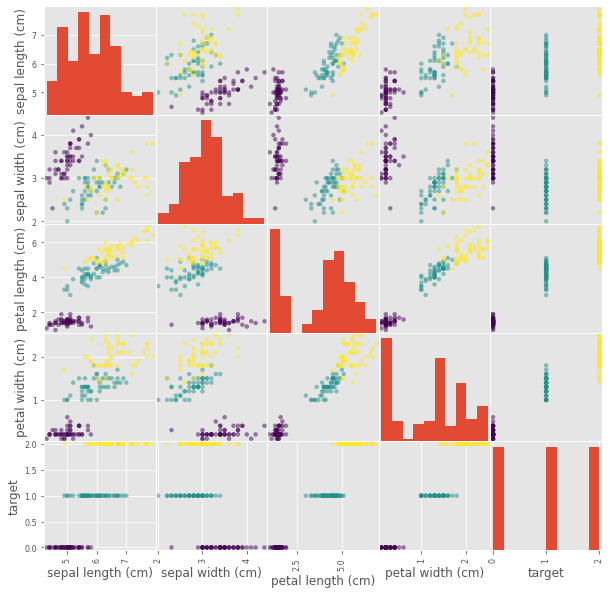

In [10]:
pd.plotting.scatter_matrix(df, c=iris.target, figsize=[10,10], s=80)
plt.show()

## 1. Classification

Since classification is part of supervised learning, first we need data that is already labeled. We use this labeled dataset to train our classifier. Second, we need a classifier.

For this example, we use the K-Neighbors-Classifier. It classifies data using k neighbors data points around the data point we are interested in labeling. We then use a majority vote to label the data point.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#help(KNeighborsClassifier)
# we learn the default is k=5
kn = KNeighborsClassifier(n_neighbors=6)

###  1.1 Lets Train the Classifier

In [19]:
# This classifier requires 2 things: 
#1- the features data must be continuous 2- no missing values
kn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=6)

In [22]:
# Lets predict insample first to see how well it does relative to our labeled data.
label_predict = kn.predict(iris.data)
label_predict
#print(label_predict == iris.target)
# print(label_predict)
# Evaluating the fit:
list(label_predict == iris.target).count(1)/len(label_predict)

0.9733333333333334

### Making Predicitions

In [23]:
# Lets create a dictionary
dic1 = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [52]:
# Now we can give new values of features and use our trained classefier to make predictions
# Suppose we have new measurements:
x_new = [np.mean(iris.data[:,0]), np.mean(iris.data[:,1]), np.mean(iris.data[:,2]), np.mean(iris.data[:,3])]
x_new = np.matrix(x_new)
#x_new[0] = x_new[0]+8
new_predict = kn.predict(x_new)
new_predict

array([1])

In [53]:
print('Label for new data is ' + str(dic1[new_predict[0]]))

Label for new data is versicolor


### Split sample between Training set and Testing set

In [53]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X =iris.data
y = iris.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a k-N classifier with 6 neighbors: kn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9555555555555556


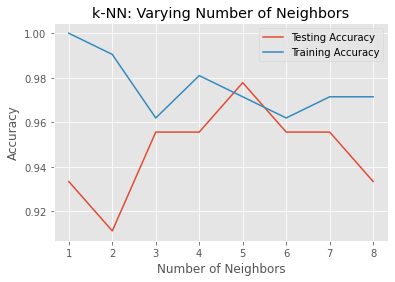

In [60]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-N Classifier with k neighbors: knn
    kn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    kn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = kn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = kn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Exercise 15.1

Use the load_wine to load the wine dataset. There are many feautures of wine and we want to classify wines into 3 classes. Use 80% of the sample to train the classifier with 5 k-neighbors and show the accuracy. After that show how would we classify a wine with mean features. 

## 2. Regression

In [73]:
from sklearn import linear_model
house = datasets.load_boston()
house.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [74]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
X = house.data
y = house.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [88]:
# Create linear regression object
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
print('Insample Accuracy'  , linear.score(X_train, y_train))
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Insample Accuracy 0.7434997532004697
Coefficient: 
 [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept: 
 31.631084035694585


In [90]:
# Out of sample forecast accuracy
print('Out of Sample Accuracy' , linear.score(X_test, y_test))

#Predict Output
predicted= linear.predict(X_test)
predicted[:5]

Out of Sample Accuracy 0.711226005748496


array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988])

## Exercise 15.2

- the  datasets.load_diabetes() to get the diabetes dataset. 
- take a look at the features of this dataset
- define X and your target y
- use the train_test_split() method with a test_size of 0.2.
- create a linear regression object and do a linear fit.
- Print the score and the estimated coefficients
- Predict the level of diabetes for the mean X.


## 3. Clustering

Clustering is a way to reduce the dimensionality of the data. It is a specific application of unsupervised  as there are not preset labels.

One common algorithm used for clustering is the k-mean algorithm. The idea is partition the dataset in a way that the distance between data points and the mean whithin each partition is minimized. 

In [109]:
from sklearn.cluster import KMeans
#help(KMeans)

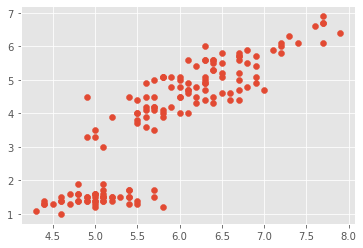

In [110]:
# Lets use once again the iris data.

import matplotlib.pyplot as plt

plt.scatter(iris.data[:,0],iris.data[:,2])
plt.show()

# How many clusters would you choose?

In [131]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(iris.data)

# Determine the cluster labels of new_points: labels
labels = model.predict(iris.data)

# Print cluster labels of new_points
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


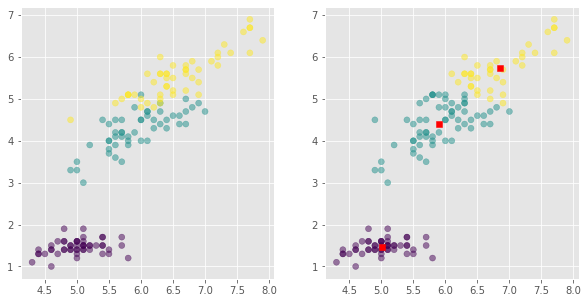

In [132]:
xs = iris.data[:,0]
ys = iris.data[:,2]

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.scatter(xs,ys, c=iris.target, alpha=0.5)
# Make a scatter plot of centroids_x and centroids_y
plt.subplot(1,2,2)
plt.scatter(xs,ys, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker= 's', c='r')
plt.show()

### What makes a good Cluster?

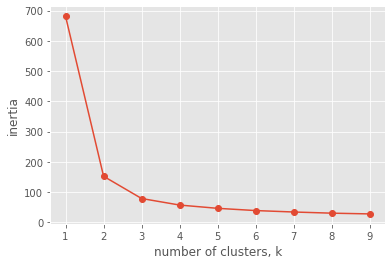

In [142]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(iris.data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### It is crucial to scale the date before performing clustering (same as in PCA). The variance difference can make a feature more important. Always scale the data first with mean zero and variance one.

## PCA

In [174]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df_scaled =df.apply(lambda x: (x-np.mean(x))/np.std(x), axis=0)

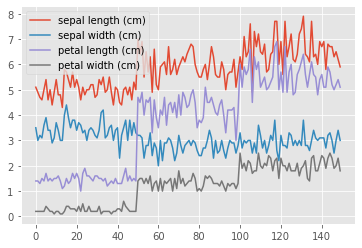

In [175]:
df.plot()
plt.show()

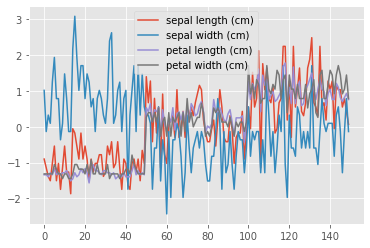

In [176]:
df_scaled.plot()
plt.show()

In [168]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_scaled)

df[['principal component 1', 'principal component 2']] = principalComponents

In [171]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),principal component 1,principal component 2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


## Exercise 15.3

- Use the unemployment and inflation data from the previous lecture.
- Use clustering with 2 clusters for each series.
- do two separate scatter plots with the color of the points given by the clusters.
